In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


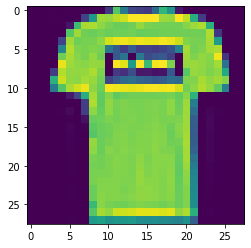

In [ ]:
plt.imshow(X_train_full[1])

In [ ]:
y_train_full[1]

0

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_names[y_train_full[1]]

'T-shirt/top'

In [ ]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
# Data Normalization
X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [ ]:
#split the data into train/validation/test datasets
#Training data - used for training the model
#Validation data - used for tuning the hyperparameters and evaluate the models.
#Test data - used to test the model after the model has gone through initial vetting by the validation set

In [ ]:
X_valid , X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [ ]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
## Building the Neural network using Keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation ='relu'))
model.add(keras.layers.Dense(100,activation ='relu'))
model.add(keras.layers.Dense(10,activation ='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


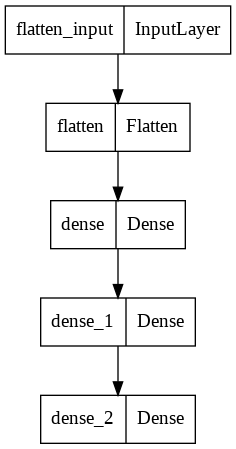

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weights,biases = model.layers[1].get_weights()

In [ ]:
weights


array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
# Random Seed
##Generate same set of random numbers while
#1. train Test split
#2. Model Training
# random value between 1 and 10



In [ ]:
import numpy as np

In [ ]:
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [ ]:
np.random.seed(42)

In [ ]:
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [ ]:
np.random.rand(5)

array([0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [ ]:
np.random.seed(42)

In [ ]:
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [ ]:
np.random.rand(5)

array([0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [ ]:
np.random.seed(82)

In [ ]:
np.random.rand(5)

array([0.27522567, 0.63923076, 0.62389921, 0.77804231, 0.47811353])

In [ ]:
np.random.rand(5)

array([0.95913389, 0.99743421, 0.83251328, 0.20384505, 0.13405   ])

In [ ]:
np.random.seed(82)

In [ ]:
np.random.rand(5)

array([0.27522567, 0.63923076, 0.62389921, 0.77804231, 0.47811353])

In [ ]:
np.random.rand(5)

array([0.95913389, 0.99743421, 0.83251328, 0.20384505, 0.13405   ])

In [ ]:
## Compiling and the training the neural network
model.compile(loss ="sparse_categorical_crossentropy",optimizer="sgd", metrics =["accuracy"])

In [ ]:
model_history = model.fit(X_train ,y_train,epochs =30, validation_data =(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2206 - accuracy: 0.9199 - val_loss: 0.2887 - val_accuracy: 0.8954
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2169 - accuracy: 0.9223 - val_loss: 0.2951 - val_accuracy: 0.8960
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2133 - accuracy: 0.9230 - val_loss: 0.3817 - val_accuracy: 0.8618
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2100 - accuracy: 0.9253 - val_loss: 0.2946 - val_accuracy: 0.8946
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2081 - accuracy: 0.9250 - val_loss: 0.2809 - val_accuracy: 0.8992
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2028 - accuracy: 0.9280 - val_loss: 0.3009 - val_accuracy: 0.8932
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2001 - accuracy: 0.9294 - val_loss: 0.2919 - val_accuracy:

In [ ]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
model_history.history

{'accuracy': [0.9199272990226746,
  0.9222545623779297,
  0.9230181574821472,
  0.9252545237541199,
  0.9249818325042725,
  0.9279636144638062,
  0.9294000267982483,
  0.9298727512359619,
  0.9298545718193054,
  0.9318363666534424,
  0.9326727390289307,
  0.9340545535087585,
  0.9360363483428955,
  0.93707275390625,
  0.9364908933639526,
  0.9387636184692383,
  0.9391272664070129,
  0.9401454329490662,
  0.9410181641578674,
  0.9420545697212219,
  0.9435818195343018,
  0.9435636401176453,
  0.9454363584518433,
  0.9457818269729614,
  0.9461454749107361,
  0.9466727375984192,
  0.9486363530158997,
  0.9487454295158386,
  0.951236367225647,
  0.9523454308509827],
 'loss': [0.22064001858234406,
  0.2169390618801117,
  0.21331460773944855,
  0.20999179780483246,
  0.20807446539402008,
  0.20275436341762543,
  0.20013964176177979,
  0.1972225457429886,
  0.19367137551307678,
  0.19041690230369568,
  0.18850648403167725,
  0.18417730927467346,
  0.1816336065530777,
  0.17935945093631744,
  0

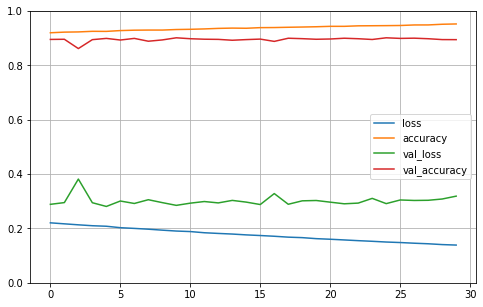

In [ ]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
##Evaluating performance and predicting using keras
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8888


[0.35649532079696655, 0.8888000249862671]